In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install catboost
import xgboost
import catboost
import lightgbm as lgbm

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.head()

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,Presence
1,1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,Absence
2,2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,Absence
3,3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,Absence
4,4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,Presence


In [ ]:
dp = {
    'Presence' : 1,
    'Absence':0
}

In [ ]:
df['Heart Disease'] = df['Heart Disease'].map(dp)

In [ ]:
df.head()

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,1
1,1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,0
2,2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,0
3,3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,0
4,4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,1


In [ ]:
X = df.drop('Heart Disease',axis=1)
Y = df['Heart Disease']

In [ ]:
Z = df['Age']


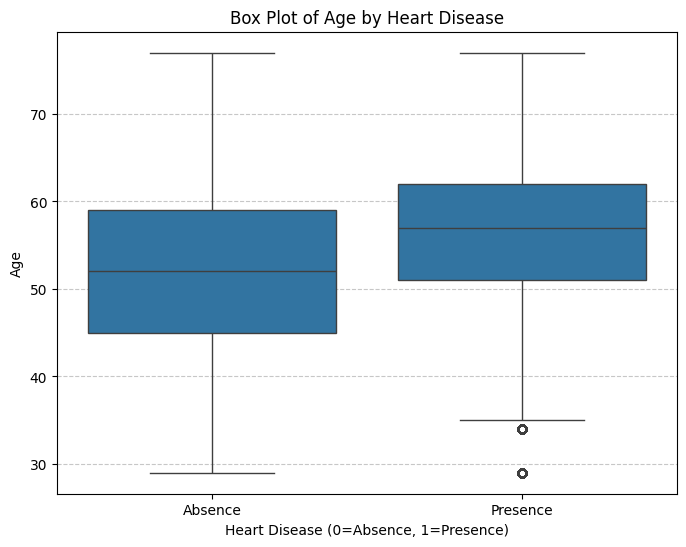

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Heart Disease', y='Age')
plt.title('Box Plot of Age by Heart Disease')
plt.xlabel('Heart Disease (0=Absence, 1=Presence)')
plt.ylabel('Age')
plt.xticks([0, 1], ['Absence', 'Presence'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

First, let's calculate the IQR for the 'Age' column and identify the outliers.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.5 MB/s eta 0:00:00


In [ ]:
model = xgboost.XGBClassifier()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
features= ['Chest pain type', 'EKG results','Age','Exercise angina','Thallium','ST depression','Max HR']

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X[features],Y)

RandomForestClassifier()

In [ ]:
rf.score(X[features],Y)

0.9259333333333334

In [ ]:
X_test = test[features]
rf_predict = rf.predict(X_test)
print("First 10 predictions on the test set:")


First 10 predictions on the test set:


In [ ]:
submission_df = pd.DataFrame({'id': test['id'], 'Heart Disease': rf_predict})
display(submission_df.head())

,id,Heart Disease
0,630000,0
1,630001,0
2,630002,1
3,630003,0
4,630004,0


In [ ]:
submission_df.to_csv('rfsubmission.csv', index=False)
print("Predictions saved to 'submission.csv'")

Predictions saved to 'submission.csv'


In [ ]:
model.fit(X[features], Y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
model.score(X[features], Y)

0.8720444444444444

In [ ]:
test = pd.read_csv('test.csv')

In [ ]:
X_test = test[features]
predictions = model.predict(X_test)
print("First 10 predictions on the test set:")
print(predictions[:10])

First 10 predictions on the test set:
[1 0 1 0 0 1 0 1 1 0]


In [ ]:
submission_df = pd.DataFrame({'id': test['id'], 'Heart Disease': predictions})
display(submission_df.head())

,id,Heart Disease
0,630000,1
1,630001,0
2,630002,1
3,630003,0
4,630004,0


In [ ]:
submission_df.to_csv('submission.csv', index=False)
print("Predictions saved to 'submission.csv'")

Predictions saved to 'submission.csv'


These are the predicted 'Heart Disease' values (0 for Absence, 1 for Presence) for the first few entries in your `test` dataset.